<center>
    <h1 style="color:blue"> YSU MMF, Python, Spring 2021 </h1>
    <h2 style="color:blue"> Lecture 30 </h2>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## SKLearn Machine Learning Library

- Load some Classification Data from `sklearn` and split into Test/Train Datasets
- Run some Classification Algorithms on that Dataset and calculate the accuracy of the prediction

- Load some Regression Data from `sklearn` and and split into Test/Train Datasets
- Run some Regression Algorithm on that Dataset, calculate the MSE

- Create a synthetic some clustering Dataset, and run some algorithm for clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
type(iris)

sklearn.utils.Bunch

In [7]:
X1 = iris.data
Y1 = iris.target

In [8]:
X1[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [9]:
Y1[:3]

array([0, 0, 0])

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
X1_train, X1_test, Y1_train, Y1_test = tts(X1, Y1, test_size=0.2)

In [14]:
X1.shape

(150, 4)

In [15]:
X1_train.shape, X1_test.shape

((120, 4), (30, 4))

In [48]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)

In [20]:
knn.fit(X1_train, Y1_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred = knn.predict(X1_test)
y_pred

array([1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       1, 2, 1, 1, 2, 2, 0, 1])

In [22]:
Y1_test

array([1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       1, 2, 1, 1, 2, 1, 0, 1])

In [26]:
sum(y_pred == Y1_test)/len(y_pred) * 100  # accuracy

96.66666666666667

In [27]:
knn.score(X1_test, Y1_test)

0.9666666666666667

In [28]:
X_new = [[30, 10, 5, 20]]

In [29]:
knn.predict(X_new)

array([2])

In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
lda = LinearDiscriminantAnalysis()

In [35]:
lda.fit(X1_train, Y1_train)

LinearDiscriminantAnalysis()

In [39]:
lda.predict(X1_test)

array([1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       1, 2, 1, 1, 2, 1, 0, 1])

In [40]:
lda.score(X1_test, Y1_test)  # accuracy

1.0

In [41]:
from sklearn.datasets import load_boston

In [42]:
x2, y2 = load_boston(return_X_y=True)

In [43]:
x2[:1]   # features

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [45]:
y2[:10]  # labels

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [53]:
X2_train, X2_test, Y2_train, Y2_test = tts(x2, y2, test_size=0.2)

In [49]:
knr = KNeighborsRegressor()

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [54]:
sc.fit(X2_train)

StandardScaler()

In [55]:
knr.fit(sc.transform(X2_train), Y2_train)

KNeighborsRegressor()

In [65]:
y2_pred = knr.predict(sc.transform(X2_test))

In [64]:
# Y2_test

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
mean_squared_error(y_pred=y2_pred, y_true=Y2_test)

25.120517647058826

# Fashion MNIST with Decision Trees and Random Forest

In [84]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996) 

In [97]:
X = fashion_mnist.data
y = fashion_mnist.target

In [98]:
y[:20]

0     9
1     0
2     0
3     3
4     0
5     2
6     7
7     2
8     5
9     5
10    0
11    9
12    5
13    5
14    7
15    9
16    1
17    0
18    6
19    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [100]:
pic = X[0].reshape(28, 28)
plt.imshow(pic, cmap="gray_r") # colormap is inverted gray

In [72]:
X_train, X_test, y_train , y_test = tts(X,y, test_size = 0.2, random_state = 1)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [75]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
dt.score(X_test, y_test)

0.7985

In [78]:
rf.score(X_test, y_test)

0.8849285714285714

### Testing on real Data

In [106]:
# !pip install scikit-image

In [107]:
from skimage import io
from skimage.transform import resize
from skimage.util import img_as_ubyte

img = io.imread('https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2Fa305185b-5462-4832-851e-b4029c0f125d.png?fit=scale-down&source=next&width=700')

In [108]:
# reading the shape of the img matrix
img.shape

(467, 700, 4)

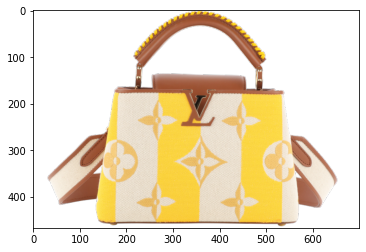

In [109]:
plt.imshow(img)

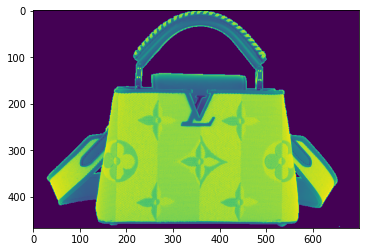

In [110]:
#in img, we have 4 layers (r,g,b, and something else), 
#I am taking just one of the layers
im_1 = img[:,:,1]
plt.imshow(im_1)

In [111]:
#I am resizing the image to 28x28, since all images in the Dataset were of that shape
im_resized = resize(im_1, output_shape=(28,28))
#Important thing: above, in the im_resized, entries are reals from 0 to 1 (intensities 
# of a color in that range). But in the Dataset, values are integers from 0 to 255, so I need 
# to transform to this format
im_resized = img_as_ubyte(im_resized)

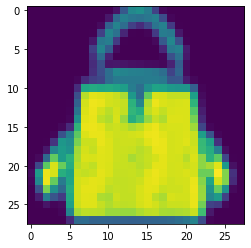

In [112]:
plt.imshow(im_resized)

In [113]:
#In the dataset, our 28x28 images are represented as one 784-dim array, so we need 
# to transform to that shape
im_for_test = im_resized.flatten()

In [114]:
#predicting
# here .reshape(1,-1) is to make from a vector of the form [] a matrix of the form [[]]
# just run np.array([1,2,3]).reshape(1,-1) to see the effect
rf.predict(im_for_test.reshape(1,-1))
##Please compare with the labels at https://github.com/zalandoresearch/fashion-mnist#labels
## No 8 label is "bag"

array(['8'], dtype=object)

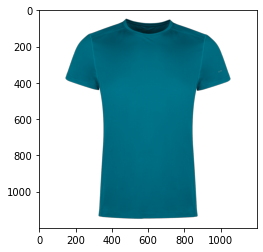

In [115]:
# Another example
img = io.imread('https://static.zajo.net/content/mediagallery/zajo_dcat/image/product/types/X/9087.png')
plt.imshow(img)

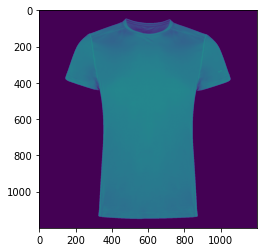

In [116]:
# taking one of the layers
im_1 = img[:,:,1]
plt.imshow(im_1)

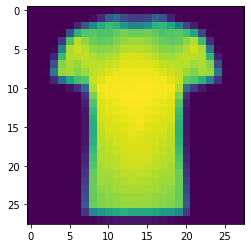

In [117]:
im_resized = resize(im_1, output_shape=(28,28))
im_resized = img_as_ubyte(im_resized)
plt.imshow(im_resized)

In [118]:
im_for_test = im_resized.flatten()

In [119]:
rf.predict(im_for_test.reshape(1,-1))
# label 0 = "T-shirt/top"

array(['0'], dtype=object)

# Fashion MNIST with Simple Neural Network

In [127]:
# !pip install --upgrade tensorflow

In [126]:
import tensorflow as tf

In [128]:
tf.__version__

'2.5.0'

In [129]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [130]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [131]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [132]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [133]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.4986 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.3727 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.3352 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.3107 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2928 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.2804 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.2676 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.2569 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.2470 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 897us/

In [134]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3389 - accuracy: 0.8862

Test accuracy: 0.8862000107765198
